# TFIM 臨界を確認する

In [2]:
import qutip as qt
import numpy as np
from pathlib import Path
from datetime import datetime
import matplotlib as mpl
from matplotlib.ticker import MultipleLocator
import matplotlib.patheffects as pe
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from functools import lru_cache

In [3]:
# ========= キャッシュ付きヘルパ =========

@lru_cache(maxsize=None)
def get_ops(N):
    """Nだけで決まる演算子たち"""
    cut_pos = N // 2 - 1
    sx, sz = qt.sigmax(), qt.sigmaz()
    I2 = qt.qeye(2)

    def op_at(i, op):
        return qt.tensor([op if k == i else I2 for k in range(N)])

    Sx = [op_at(i, sx) for i in range(N)]
    Sz = [op_at(i, sz) for i in range(N)]

    def H_exchange(i):
        return Sz[i] * Sz[i+1]

    Hcut_unit   = H_exchange(cut_pos)
    Hex_rest_unit = sum(H_exchange(i) for i in range(N-1) if i != cut_pos)
    Hhx_unit    = sum(Sx[i] for i in range(N))

    left_sites = list(range(N//2))
    return Hcut_unit, Hex_rest_unit, Hhx_unit, left_sites


@lru_cache(maxsize=None)
def get_psi0(N, J, hx):
    """(N, J, hx)で決まる初期基底状態"""
    Hcut_unit, Hex_rest_unit, Hhx_unit, _ = get_ops(N)
    H_full = -J * (Hcut_unit + Hex_rest_unit) - hx * Hhx_unit
    _, psi0 = H_full.groundstate(sparse=True)
    return psi0

# シミュレーション関数
# ========= メイン: Tcut ごとの時間発展 =========

def simulate(N, J, hx, Tcut):
    Hcut_unit, Hex_rest_unit, Hhx_unit, left_sites = get_ops(N)
    psi0 = get_psi0(N, J, hx)

    # H(t) = H_static + (-J * Hcut_unit) * ramp(t)
    H_static = -J * Hex_rest_unit - hx * Hhx_unit

    def ramp(t, T_cut):
        if T_cut == 0.0:
        # # 瞬間クエンチ：t<0で1, t>0で0, t=0は0.5（数値安定のための慣習値）
        #     return 1.0 if t < 0.0 else (0.5 if t == 0.0 else 0.0)
            return 1.0 if t <= 0.0 else 0.0
        if t <= 0.0:
            return 1
        if t >= T_cut:
            return 0.0
        return 1.0 - t / T_cut

    Ht = [H_static, [-J * Hcut_unit, lambda t, args: ramp(t, Tcut)]]

    # 0〜Tcut を分割（最後の点だけ使う）
    nt = 101
    tlist = np.linspace(0.0, Tcut, 1001)

    opts = qt.Options(
        method='bdf',      # ← これが効くようにする
        rtol=1e-6,
        atol=1e-8,
        nsteps=200000,
        store_states=True,
        store_final_state=True,
        progress_bar=None,
    )
    
    def EE_op(t, state, args=None):
        rhoL = qt.ptrace(state, left_sites)
        return qt.entropy_vn(rhoL, base=2)
        
    result = qt.sesolve(Ht, psi0, tlist, e_ops = [EE_op], options=opts)
    # Tcut = 0のSAを返す + 初期状態
    return float(result.expect[0][0]), states[0]

# グラフ設定
mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use('default')
mpl.rcParams.update({
    "axes.labelsize": 18,   # 軸ラベル
    "xtick.labelsize": 16,  # 目盛り数字
    "ytick.labelsize": 16,
    "lines.linewidth": 2.2, # 線の太さ
    "axes.titlesize": 16,
})

def inward_ticks(ax, major_len=7, minor_len=4, width=1.2):
    ax.minorticks_on()
    ax.tick_params(which='both', direction='in', top=True, right=True, length=major_len, width=width)
    ax.tick_params(which='minor', length=minor_len, width=width)

markers = ['o', '^', 's', 'D', 'x']

OUTDIR = Path("../charts/tfim2")

start simulation N = 4
hx is 0.0
hx is 0.1
hx is 0.2
hx is 0.30000000000000004
hx is 0.4
hx is 0.5
hx is 0.6000000000000001
hx is 0.7000000000000001
hx is 0.8
hx is 0.9
hx is 1.0
start simulation N = 6
hx is 0.0
hx is 0.1
hx is 0.2
hx is 0.30000000000000004
hx is 0.4
hx is 0.5
hx is 0.6000000000000001
hx is 0.7000000000000001
hx is 0.8
hx is 0.9
hx is 1.0
start simulation N = 8
hx is 0.0
hx is 0.1
hx is 0.2
hx is 0.30000000000000004
hx is 0.4
hx is 0.5
hx is 0.6000000000000001
hx is 0.7000000000000001
hx is 0.8
hx is 0.9
hx is 1.0
start simulation N = 10
hx is 0.0
hx is 0.1
hx is 0.2
hx is 0.30000000000000004
hx is 0.4
hx is 0.5
hx is 0.6000000000000001
hx is 0.7000000000000001
hx is 0.8
hx is 0.9
hx is 1.0
start simulation N = 12
hx is 0.0
hx is 0.1
hx is 0.2
hx is 0.30000000000000004
hx is 0.4
hx is 0.5
hx is 0.6000000000000001
hx is 0.7000000000000001
hx is 0.8
hx is 0.9
hx is 1.0
start simulation N = 14
hx is 0.0
hx is 0.1
hx is 0.2
hx is 0.30000000000000004
hx is 0.4
hx is 0.5
hx 

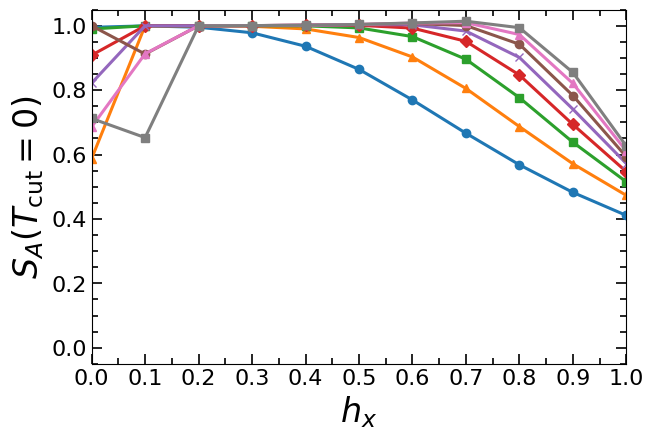

In [23]:
# 想定 : N_list = リスト hx = リスト 
# グラフ : (SA vs Tcut (len(N_list)本)) × len(hx_list)
N_list = [4, 6, 8, 10, 12, 14, 16, 18]
hx_list = np.linspace(0.0, 1.0, 11)
nstamp = '-'.join(map(str, N_list))
J = 1.0
fig2, ax2 = plt.subplots(figsize=(6.9, 4.6))
max_SA2 = 0.0
for j, N in enumerate(N_list):
    print(f"start simulation N = {N}")
    resiEE0 = []
    for hx in hx_list:
        resiEE0.append(simulate(N=N, J=J, hx=hx, Tcut=0.0))
        print(f"hx is {hx}")
    resiEE0 = np.asarray(resiEE0)
    max_SA2 = max(max_SA2, resiEE0.max())
    mk = markers[j % len(markers)]
    ax2.plot(hx_list, resiEE0, marker=mk, markersize=6.0, label=fr"$N={N:g}$", linewidth=2.2)
    
inward_ticks(ax2)
ax2.set_xlim(hx_list.min(), hx_list.max())
ax2.set_xlabel(r"$h_x$", fontsize=24)
ax2.set_ylim(-0.05, 1.05)
ax2.set_ylabel(r"$S_A(T_{\rm cut}=0)$", fontsize=24)        
ax2.xaxis.set_major_locator(MultipleLocator(0.1))
ax2.xaxis.set_minor_locator(MultipleLocator(0.05))
ax2.legend(frameon=False, title=fr"$h_x={hx:g}$") 
plt.show()
fig2.savefig(OUTDIR / f"SA_vs_Tcut_N{nstamp}_hx{hx}_detailed.pdf", bbox_inches="tight", dpi=300)